# ATOM Model

In [53]:
# Importing Python Packages

In [54]:
import numpy as np
import pandas as pd
from pandas_datareader import data 
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
# Downloading data

df = pd.read_csv('atom.csv', index_col = 'Date')
df.index = pd.to_datetime (df.index)
df.columns

Index(['Price', 'Volume', 'CirSupply', 'Velocity', 'Valuation'], dtype='object')

# Correlation Matrix

In [56]:
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov() 
cov_matrix

,Price,Volume,CirSupply,Velocity,Valuation
Price,4.807962e-03,0.000189,-4.126632e-07,0.000231,0.005144
Volume,1.893208e-04,0.101317,-2.965291e-05,0.101379,0.202281
CirSupply,-4.126632e-07,-0.000030,4.966046e-05,-0.000073,-0.000160
Velocity,2.314213e-04,0.101379,-7.251557e-05,0.102821,0.202498
Valuation,5.143919e-03,0.202281,-1.597875e-04,0.202498,0.412027


In [57]:
corr_matrix = df.pct_change().apply(lambda x: np.log(1+x)).corr() 
corr_matrix

,Price,Volume,CirSupply,Velocity,Valuation
Price,1.000000,0.008578,-0.000845,0.010408,0.115571
Volume,0.008578,1.000000,-0.013220,0.993269,0.990038
CirSupply,-0.000845,-0.013220,1.000000,-0.032091,-0.035324
Velocity,0.010408,0.993269,-0.032091,1.000000,0.983825
Valuation,0.115571,0.990038,-0.035324,0.983825,1.000000


In [58]:
import statsmodels.api as sm

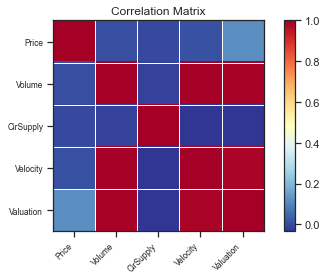

In [59]:
sm.graphics.plot_corr(corr_matrix, xnames=list(corr_matrix.columns))
plt.show()

In [60]:
val = df ['Valuation']

In [61]:
val.describe()

count    1208.000000
mean        0.502318
std         1.091063
min         0.010000
25%         0.110000
50%         0.220000
75%         0.440000
max        18.920000
Name: Valuation, dtype: float64

# Chart Visualisation

In [62]:
import numpy as np
import pandas as pd
from pandas_datareader import data 
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
# Download the data
data = pd.read_csv('atom.csv',
                   parse_dates=['Date'],
                   index_col=['Date'])
data.head()

,Price,Volume,CirSupply,Velocity,Valuation
Date,,,,,
2019-04-30,3.94,13686531,190546613,0.07,0.02
2019-05-01,4.39,20621546,190693816,0.11,0.05
2019-05-02,4.59,18257924,190881932,0.10,0.04
2019-05-03,5.31,30479748,190718793,0.16,0.14
2019-05-04,5.26,31346671,190688146,0.16,0.14


In [64]:
price = df ['Price']

In [65]:
price.describe()

count    1208.000000
mean       12.301937
std        10.870905
min         1.650000
25%         4.007500
50%         6.440000
75%        20.465000
max        44.540000
Name: Price, dtype: float64

In [66]:
# Import necessary packages
import os
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns
import pandas as pd

# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Use white grid plot background from seaborn
sns.set(font_scale=1.5, style="whitegrid")

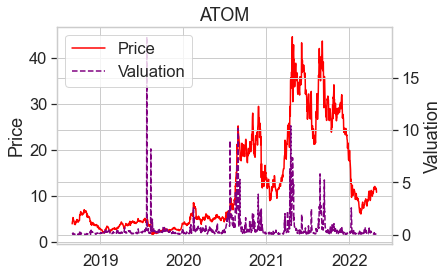

In [67]:
# Create figure and plot space
plt.rc('font', size=8)
fig, ax = plt.subplots(figsize=(6, 4))
axb = ax.twinx()

# Add x-axis and y-axis
ax.plot(data.index.values, price, color='red', label='Price')

# Set title and labels for axes
ax.set(xlabel="",
       ylabel="Price",
       title="ATOM")

# Plotting on the second y-axis
axb.set_ylabel('Valuation')
axb.plot(data.index.values, val, color='purple', linestyle='--', label='Valuation')

# Handling of getting lines and labels from all axes for a single legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = axb.get_legend_handles_labels()
axb.legend(lines + lines2, labels + labels2, loc='upper left');

# Define the date format
date_form = DateFormatter("%Y")
ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=47))

plt.show()

# Linear Regression

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:title={'center':'Velocity vs Valuation'}, xlabel='Velocity', ylabel='Valuation'>

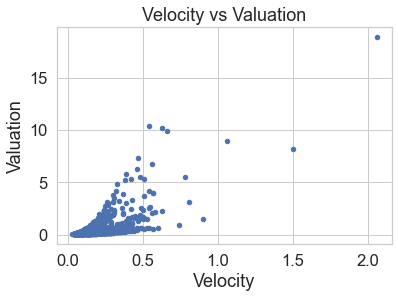

In [69]:
df.plot (kind='scatter', x='Velocity', y='Valuation', title='Velocity vs Valuation')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:title={'center':'Circulation supply vs Valuation'}, xlabel='CirSupply', ylabel='Valuation'>

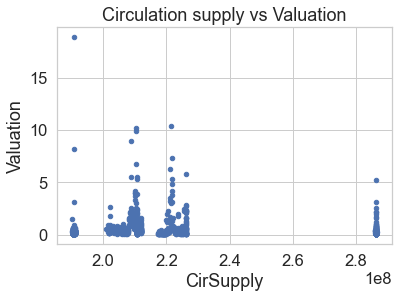

In [70]:
df.plot (kind='scatter', x='CirSupply', y='Valuation', title='Circulation supply vs Valuation')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:title={'center':'Volume vs Valuation'}, xlabel='Volume', ylabel='Valuation'>

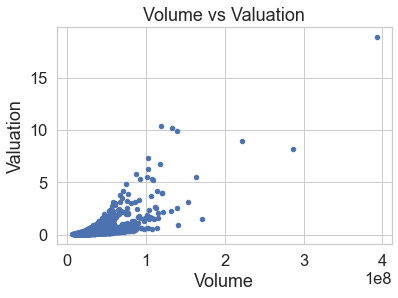

In [71]:
df.plot (kind='scatter', x='Volume', y='Valuation', title='Volume vs Valuation')

In [72]:
import sklearn.linear_model as lm

In [73]:
lr =lm.LinearRegression()

In [74]:
df.columns = df.columns.str.strip()

In [75]:
x = df.Volume       #Independent variable
y = df.Valuation        #Dependent variable

In [76]:
x = df.iloc[:, 1].values
y = df.iloc[:, 4].values

x = x.reshape (-1,1) #reshape to column

In [77]:
lr.fit (x,y)

LinearRegression()

Text(0.5, 0, 'Volume')

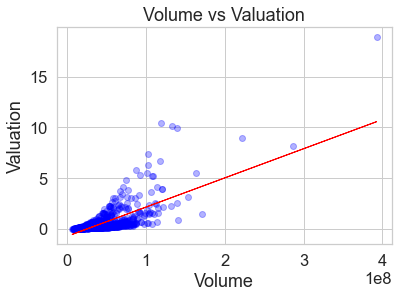

In [78]:
plt.scatter (x,y, color ='blue', alpha=0.3)
plt.plot (x, lr.predict (x), color = 'red', linewidth=1)
plt.title ('Volume vs Valuation')
plt.ylabel ('Valuation')
plt.xlabel ('Volume')

In [79]:
lr.predict (x)

array([-0.32275824, -0.12343481, -0.19136909, ..., -0.05293678,
        0.11702711,  0.29661525])

In [80]:
R_Sq = r2_score (y, lr.predict (x))
R_Sq

0.5053062283769983

In [81]:
# Model Statistics

In [82]:
import statsmodels.formula.api as smf
model1=smf.ols(formula='Valuation~Volume',data=df).fit()
model1.params

Intercept   -7.161311e-01
Volume       2.874160e-08
dtype: float64

In [83]:
model1.pvalues

Intercept     1.064912e-60
Volume       1.562869e-186
dtype: float64

In [84]:
model1.rsquared

0.5053062283769983

In [85]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Valuation   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     1232.
Date:                Sat, 03 Sep 2022   Prob (F-statistic):          1.56e-186
Time:                        00:56:18   Log-Likelihood:                -1393.8
No. Observations:                1208   AIC:                             2792.
Df Residuals:                    1206   BIC:                             2802.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7161      0.041    -17.404      0.000      -0.797      -0.635
Volume      2.874e-08   8.19e-10     35.098      0.000    2.71e-08    3.03e-08
==============================================================================
Omnibus:                     1101.570   Durbin-Watson:                   0.626
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            60554.215
Skew:                           4.018   Prob(JB):                         0.00
Kurtosis:                      36.742   Cond. No.                     9.36e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.36e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [86]:
val_pred=model1.predict(pd.DataFrame(df['Volume']))
val_pred

Date
2019-04-30   -0.322758
2019-05-01   -0.123435
2019-05-02   -0.191369
2019-05-03    0.159906
2019-05-04    0.184822
                ...   
2022-08-15   -0.241771
2022-08-16   -0.214003
2022-08-17   -0.052937
2022-08-18    0.117027
2022-08-19    0.296615
Length: 1208, dtype: float64

In [87]:
df['val_pred']=-1.301119e-01*df['Volume']+3.395391e-08
df['RSE']=(df['Valuation']-df['val_pred'])**2
RSEd=df.sum()['RSE']
RSE=np.sqrt(RSEd/693)
valmean=np.mean(df['Valuation'])
error=RSE/valmean
RSE,valmean,error

(8631639.031158319, 0.5023178807947015, 17183618.901844528)

# Multiple Linear Regression

In [88]:
import statsmodels.formula.api as smf
model2=smf.ols(formula='Valuation~Volume+Velocity',data=df).fit()
model2.params

Intercept   -8.062966e-01
Volume       7.027235e-08
Velocity    -8.261665e+00
dtype: float64

In [89]:
val_pred=model2.predict(df[['Volume','Velocity']])
val_pred

Date
2019-04-30   -0.422828
2019-05-01   -0.265955
2019-05-02   -0.349436
2019-05-03    0.013721
2019-05-04    0.074641
                ...   
2022-08-15   -0.142200
2022-08-16   -0.074309
2022-08-17    0.154260
2022-08-18    0.404584
2022-08-19    0.678438
Length: 1208, dtype: float64

In [90]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Valuation   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     715.1
Date:                Sat, 03 Sep 2022   Prob (F-statistic):          1.81e-205
Time:                        00:56:25   Log-Likelihood:                -1346.2
No. Observations:                1208   AIC:                             2698.
Df Residuals:                    1205   BIC:                             2714.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8063      0.041    -19.857      0.000      -0.886      -0.727
Volume      7.027e-08   4.26e-09     16.512      0.000    6.19e-08    7.86e-08
Velocity      -8.2617      0.832     -9.930      0.000      -9.894      -6.629
==============================================================================
Omnibus:                     1164.783   Durbin-Watson:                   0.686
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            86615.461
Skew:                           4.286   Prob(JB):                         0.00
Kurtosis:                      43.588   Cond. No.                     1.97e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.97e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [91]:
import numpy as np
df['val_pred']=-3.726460e-01 + 2.499669e-08*df['Volume'] + 3.684614e+00*df['Velocity']
df['RSE']=(df['Valuation']-df['val_pred'])**2
RSEd=df.sum()['RSE']
RSE=np.sqrt(RSEd/692)
valmean=np.mean(df['Valuation'])
error=RSE/valmean
RSE,valmean,error

(1.7024157823094335, 0.5023178807947015, 3.3891204103984798)

In [92]:
import statsmodels.formula.api as smf
model3=smf.ols(formula='Valuation~Volume+Velocity+CirSupply',data=df).fit()
model3.params

Intercept   -3.345328e-01
Volume       8.170638e-08
Velocity    -1.064447e+01
CirSupply   -2.181921e-09
dtype: float64

In [93]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Valuation   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     478.8
Date:                Sat, 03 Sep 2022   Prob (F-statistic):          9.85e-205
Time:                        00:56:27   Log-Likelihood:                -1344.5
No. Observations:                1208   AIC:                             2697.
Df Residuals:                    1204   BIC:                             2717.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3345      0.258     -1.297      0.195      -0.840       0.171
Volume      8.171e-08   7.49e-09     10.902      0.000     6.7e-08    9.64e-08
Velocity     -10.6445      1.531     -6.951      0.000     -13.649      -7.640
CirSupply  -2.182e-09   1.18e-09     -1.853      0.064   -4.49e-09    1.29e-10
==============================================================================
Omnibus:                     1189.748   Durbin-Watson:                   0.709
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            99132.277
Skew:                           4.399   Prob(JB):                         0.00
Kurtosis:                      46.498   Cond. No.                     1.63e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [94]:
val_pred=model3.predict(df[['Volume','Velocity','CirSupply']])
val_pred

Date
2019-04-30   -0.377127
2019-05-01   -0.236592
2019-05-02   -0.323681
2019-05-03    0.036608
2019-05-04    0.107508
                ...   
2022-08-15   -0.249510
2022-08-16   -0.170625
2022-08-17    0.074598
2022-08-18    0.344686
2022-08-19    0.642283
Length: 1208, dtype: float64

In [95]:
import numpy as np
df['val_pred']=-0.3919 + 2.436e-08*df['Volume'] + 3.7717*df['Velocity'] + 1.105e-10*df['CirSupply']
df['RSE']=(df['Valuation']-df['val_pred'])**2
RSEd=df.sum()['RSE']
RSE=np.sqrt(RSEd/692)
valmean=np.mean(df['Valuation'])
error=RSE/valmean
RSE,valmean,error

(1.6953665257013717, 0.5023178807947015, 3.375086952945384)

In [96]:
model4=smf.ols(formula='Volume~Velocity+CirSupply',data=df).fit()
rsquared=model4.rsquared 
VIF=1/(1-rsquared)
VIF

90.72625446124734

# Polynomial Regression

In [97]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [98]:
x=df.Volume
y=df.Valuation

In [99]:
degree=2
model5=make_pipeline (PolynomialFeatures (degree), lr)

In [100]:
x = df.iloc[:, 1].values
y = df.iloc[:, 4].values

x = x.reshape (-1, 1) #reshape to column

In [101]:
model5.fit (x,y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

Text(0.5, 8.959999999999994, 'Volume')

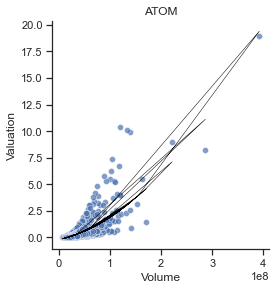

In [102]:
import seaborn as sns
sns.set_theme(style="ticks")
sns.relplot(x="Volume", y="Valuation", alpha=.7, palette="muted",
            height=4, data=df)
plt.plot (x, model5.predict (x), color='black', linewidth=.5)
plt.title ('ATOM')
plt.ylabel ('Valuation')
plt.xlabel ('Volume')

Text(0.5, 8.959999999999994, 'Circulation Supply')

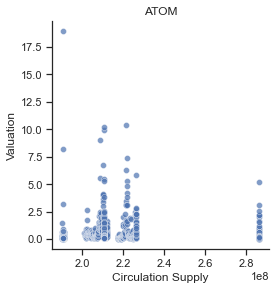

In [103]:
import seaborn as sns
sns.set_theme(style="ticks")
sns.relplot(x="CirSupply", y="Valuation", alpha=.7, palette="muted",
            height=4, data=df)
plt.title ('ATOM')
plt.ylabel ('Valuation')
plt.xlabel ('Circulation Supply')